**뉴스데이터 감성 분석**


**Task_1: 데이터 출처**

DACON, 2023 NH 투자증권 빅데이터 경진대회, “블룸버그, 나스닥과 함께 세계속으로!"

https://dacon.io/competitions/official/236145/overview/description


**TASK 2. 기초 통계 확인**


**TASK 3. 분석 목적/인사이트 설명**

1. 분석 목적: 금융 도메인에서 숨겨진 인사이트 탐색 AI 시스템을 만들기 위해, 우선적으로 뉴스데이터 감성 분석을 통한 전망 분석

2. 인사이트:
- 반복성 지표: 동일 제목(예, 배당 관련 뉴스)이 여러 번 등장. 이는 뉴스 콘텐츠의 중복 또는 인기 주제의 반복 보도를 시사함
- 주요 주제 집중: ctgy_cfc_ifo에서 'Stocks,Investing', 'Markets' 등 주식 및 시장 관련 범주가 압도적. 투자 및 금융 시장 뉴스가 주류를 이룸
- 다양성 및 긴 꼬리: 소수 등장 범주들이 다수 존재, 이는 특정 소주제의 다양성 또는 전문 분야 세분화를 반영
- 분석 및 활용 제언:
콘텐츠 중복 여부 및 영향 분석 필요
핵심 뉴스 주제와 니치 주제 간 차별화 전략 마련
투자자 관심 트렌드 분석 및 관련 인사이트 도출 가능

## 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/3rd/pj')

Mounted at /content/drive


In [2]:
#기본
import numpy as np #수학적 계산
import pandas as pd #데이터프레임
import matplotlib.pyplot as plt #시각화
import seaborn as sns #시각화
import itertools #반복문 유틸리티
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

##1. 데이터셋 불러오기

###1.1 월별 뉴스 데이터

In [3]:
jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202301.csv', encoding = 'cp949')
feb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202302.csv', encoding = 'cp949')
mar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202303.csv', encoding = 'cp949')
apr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202304.csv', encoding = 'cp949')
may = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202305.csv', encoding = 'cp949')
jun = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202306.csv', encoding = 'cp949')
jul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202307.csv', encoding = 'cp949')
aug = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_RSS_IFO_202308.csv', encoding = 'cp949')

###1.2 주가 데이터

In [4]:
price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3rd/pj/NASDAQ_DT_FC_STK_QUT.csv', encoding = 'cp949')

##2. 전처리

In [5]:
# 모든 열이 중복되는 행 제거
jan.drop_duplicates(inplace = True, ignore_index =  True)
feb.drop_duplicates(inplace = True, ignore_index =  True)
mar.drop_duplicates(inplace = True, ignore_index =  True)
apr.drop_duplicates(inplace = True, ignore_index =  True)
may.drop_duplicates(inplace = True, ignore_index =  True)
jun.drop_duplicates(inplace = True, ignore_index =  True)
jul.drop_duplicates(inplace = True, ignore_index =  True)
aug.drop_duplicates(inplace = True, ignore_index =  True)

In [6]:
# 날짜 열을 정수 형식에서 날짜 형식으로 변환
jan['rgs_dt'] = pd.to_datetime(jan['rgs_dt'].astype(str), format = '%Y%m%d')
feb['rgs_dt'] = pd.to_datetime(feb['rgs_dt'].astype(str), format = '%Y%m%d')
mar['rgs_dt'] = pd.to_datetime(mar['rgs_dt'].astype(str), format = '%Y%m%d')
apr['rgs_dt'] = pd.to_datetime(apr['rgs_dt'].astype(str), format = '%Y%m%d')
may['rgs_dt'] = pd.to_datetime(may['rgs_dt'].astype(str), format = '%Y%m%d')
jun['rgs_dt'] = pd.to_datetime(jun['rgs_dt'].astype(str), format = '%Y%m%d')
jul['rgs_dt'] = pd.to_datetime(jul['rgs_dt'].astype(str), format = '%Y%m%d')
aug['rgs_dt'] = pd.to_datetime(aug['rgs_dt'].astype(str), format = '%Y%m%d')
price['trd_dt'] = pd.to_datetime(price['trd_dt'].astype(str), format = '%Y%m%d')

In [7]:
# 뉴스 데이터 형태 보기
jan.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd,url_ifo
0,2023-01-02,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS,https://www.nasdaq.com/articles/hoak-co.-urges...
1,2023-01-02,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN (PFX) has been beaten down lately wi...,PFX,https://www.nasdaq.com/articles/heres-why-phen...
2,2023-01-02,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN",https://www.nasdaq.com/articles/my-advice-sell...
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV,https://www.nasdaq.com/articles/frances-invivo...
4,2023-01-02,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN",https://www.nasdaq.com/articles/my-advice-sell...


In [8]:
# 뉴스 데이터의 url_ifo 컬럼이 필요 없다고 판단하여 삭제
jan.drop('url_ifo', axis = 1, inplace = True)
feb.drop('url_ifo', axis = 1, inplace = True)
mar.drop('url_ifo', axis = 1, inplace = True)
apr.drop('url_ifo', axis = 1, inplace = True)
may.drop('url_ifo', axis = 1, inplace = True)
jun.drop('url_ifo', axis = 1, inplace = True)
jul.drop('url_ifo', axis = 1, inplace = True)
aug.drop('url_ifo', axis = 1, inplace = True)

In [9]:
# 뉴스 데이터를 하나로 결합
news = pd.concat([jan, feb, mar, apr, may, jun, jul, aug], ignore_index = True)
news.head()

,rgs_dt,tck_iem_cd,til_ifo,ctgy_cfc_ifo,mdi_ifo,news_smy_ifo,rld_ose_iem_tck_cd
0,2023-01-02,NGS,Hoak & Co. Urges NGS Board to Halt CEO Search ...,Investing,Fintel,"Fintel reports that Hoak Public Equities, LP, ...",NGS
1,2023-01-02,PFX,Here's Why PhenixFIN (PFX) is Poised for a Tur...,"Stocks,Investing",Zacks,PhenixFIN (PFX) has been beaten down lately wi...,PFX
2,2023-01-02,TYG,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN"
3,2023-01-02,NVIV,France's InVivo to buy one of the world's olde...,"Commodities,BioTech,US Markets",Reuters,"Malteries Soufflet, a branch of French agribus...",NVIV
4,2023-01-02,FEN,My Advice? Sell These 2 Dividend Funds in 2023,"Markets,Stocks",BNK Invest,There's a disconnect setting up in the energy ...,"TYG,TYG,FEN"


### 기초 통계 확인

In [10]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146914 entries, 0 to 146913
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rgs_dt              146914 non-null  datetime64[ns]
 1   tck_iem_cd          146914 non-null  object        
 2   til_ifo             146914 non-null  object        
 3   ctgy_cfc_ifo        146914 non-null  object        
 4   mdi_ifo             146914 non-null  object        
 5   news_smy_ifo        146914 non-null  object        
 6   rld_ose_iem_tck_cd  146914 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 7.8+ MB


In [11]:
# 누락값 및 고유값 확인
print("Missing values per column:")
print(news.isnull().sum())
print("\nUnique counts per column:")
print(news.nunique())

Missing values per column:
rgs_dt                0
tck_iem_cd            0
til_ifo               0
ctgy_cfc_ifo          0
mdi_ifo               0
news_smy_ifo          0
rld_ose_iem_tck_cd    0
dtype: int64

Unique counts per column:
rgs_dt                  242
tck_iem_cd             5976
til_ifo               83328
ctgy_cfc_ifo            511
mdi_ifo                  32
news_smy_ifo          79215
rld_ose_iem_tck_cd    40129
dtype: int64


In [12]:
# 날짜 범위 및 분포 확인
print("\n등록일 최소:", news['rgs_dt'].min())
print("등록일 최대:", news['rgs_dt'].max())


등록일 최소: 2023-01-02 00:00:00
등록일 최대: 2023-08-31 00:00:00


In [13]:
# 날짜별 뉴스 건수 집계
news['date'] = news['rgs_dt'].dt.date
daily_counts = news.groupby('date').size()
print("\n날짜별 뉴스 건수:")
print(daily_counts)


날짜별 뉴스 건수:
date
2023-01-02      13
2023-01-03      79
2023-01-04      73
2023-01-05      56
2023-01-06      62
              ... 
2023-08-27     257
2023-08-28    1848
2023-08-29    2062
2023-08-30    1910
2023-08-31     182
Length: 242, dtype: int64


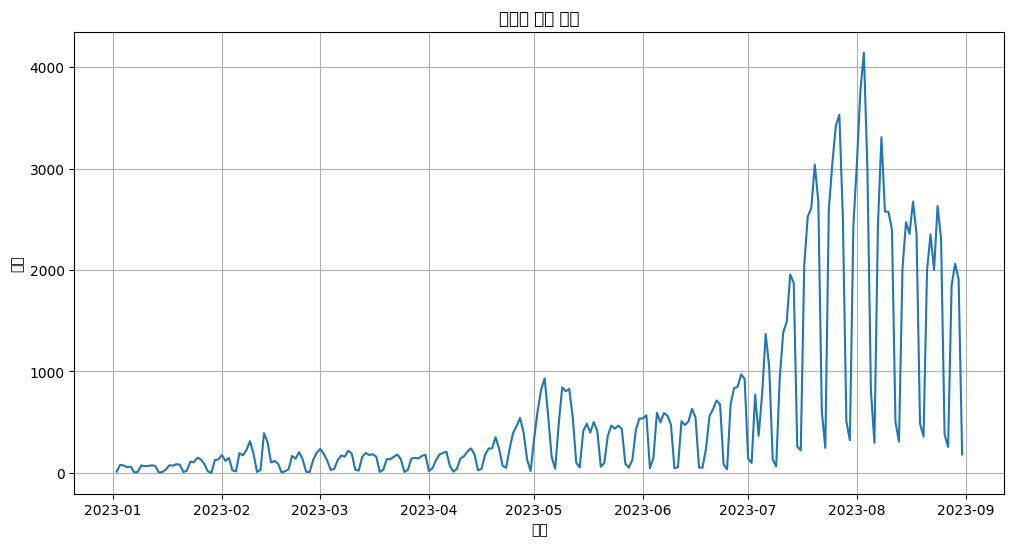

In [14]:
# 날짜별 뉴스 건수 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
daily_counts.plot(title="날짜별 뉴스 건수")
plt.xlabel("날짜")
plt.ylabel("건수")
plt.grid(True)
plt.show()

In [15]:
# 범주형 변수 빈도수 분석 (til_ifo, ctgy_cfc_ifo)
print("\ntil_ifo 빈도수:")
print(news['til_ifo'].value_counts())
print("\nctgy_cfc_ifo 빈도수:")
print(news['ctgy_cfc_ifo'].value_counts())


til_ifo 빈도수:
til_ifo
5 Dividend Growth Stocks With Upside To Analyst Targets                                     86
5 Dividend Aristocrats Where Analysts See Capital Gains                                     58
3 Stocks to Avoid This Week                                                                 49
3 Top Dividend Stocks to Maximize Your Retirement Income                                    49
Improve Your Retirement Income with These 3 Top-Ranked Dividend Stocks                      46
                                                                                            ..
Wall Street slips as investors eye Russia, more Fed hikes                                    1
GLOBAL MARKETS-Stocks down, gold up after aborted Russian mutiny ignites safe-haven push     1
Why Ameren (AEE) is a Great Dividend Stock Right Now                                         1
Corning (GLW) Declares $0.28 Dividend                                                        1
Bain Capital Specialty Finan

## W2
### Task1. 시각화

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns
import pandas as pd

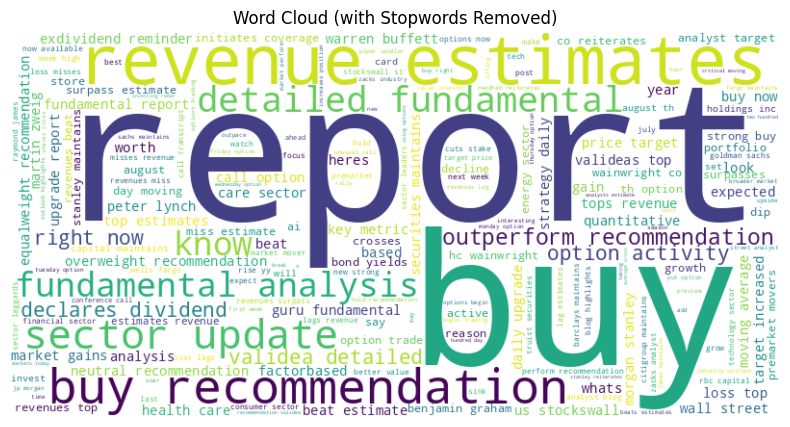

In [21]:
# 1) 텍스트 전처리
text_data = " ".join(news['til_ifo'].astype(str).tolist())
text_data = re.sub(r'[^a-zA-Z ]', '', text_data.lower())

# 2) WordCloud에 사용할 stopwords 정의
my_stopwords = set(STOPWORDS)
# 내장된 영어 불용어 외에 추가로 제거할 단어
my_stopwords.update(["to", "for", "the", "and", "of", "in", "on", "q", "stocks", "stock", "earnings"])

# 3) 워드클라우드 생성 시 stopwords 인자로 전달
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=my_stopwords  # 불용어 세트
).generate(text_data)

# 4) 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (with Stopwords Removed)')
plt.show()

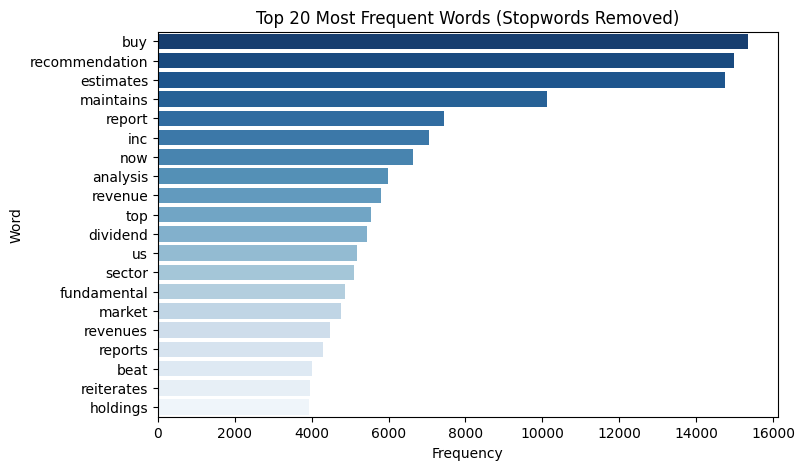

In [34]:
# 3) 전체 단어 리스트로 분할
words = text_data.split()

# 4) 불용어 제거
filtered_words = [w for w in words if w not in my_stopwords]

# 5) 단어 빈도 계산
word_counts = Counter(filtered_words)
most_common_20 = word_counts.most_common(20)

# 6) DataFrame 변환 및 시각화
df_common_20 = pd.DataFrame(most_common_20, columns=['word', 'count'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_common_20, x='count', y='word', palette='Blues_r')
plt.title('Top 20 Most Frequent Words (Stopwords Removed)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

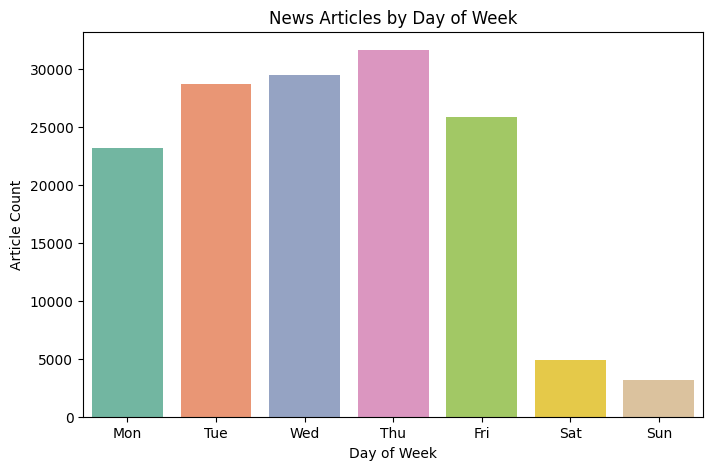

In [25]:
# 날짜 컬럼을 datetime으로 변환
news['rgs_dt'] = pd.to_datetime(news['rgs_dt'])

# 요일 추출 (월=0, 화=1, ... 일=6)
news['weekday'] = news['rgs_dt'].dt.weekday

# 요일별 기사 수
weekday_count = news.groupby('weekday').size().reset_index(name='count')

# 요일 이름 매핑
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
weekday_count['weekday_name'] = weekday_count['weekday'].map(weekday_map)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_count, x='weekday_name', y='count', palette='Set2')
plt.title('News Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Article Count')
plt.show()

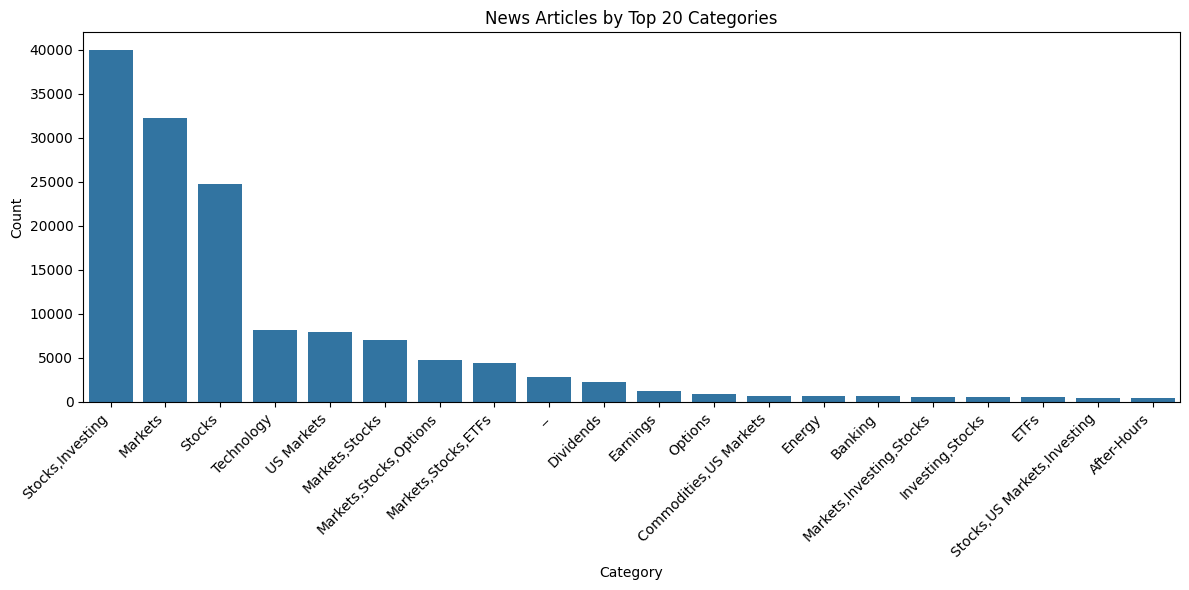

In [33]:
# 카테고리별 기사 수 계산
category_counts = news['ctgy_cfc_ifo'].value_counts()

# 예: 상위 20개 카테고리만 추출
topN = 20
top_categories = category_counts.head(topN).index

# 상위 20개 카테고리에 해당하는 데이터만 필터링
news_topN = news[news['ctgy_cfc_ifo'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.countplot(data=news_topN, x='ctgy_cfc_ifo', order=top_categories)
plt.title(f'News Articles by Top {topN} Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # 레이블 45도 회전, 오른쪽 정렬
plt.tight_layout()
plt.show()


In [26]:
!pip install textblob
from textblob import TextBlob

# 간단한 감성 분석 함수 정의 (영어 텍스트 기준)
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity  # -1(부정) ~ +1(긍정)

# 'til_ifo' 컬럼에 대해 감성 점수 계산
news['sentiment_score'] = news['til_ifo'].astype(str).apply(get_sentiment_score)

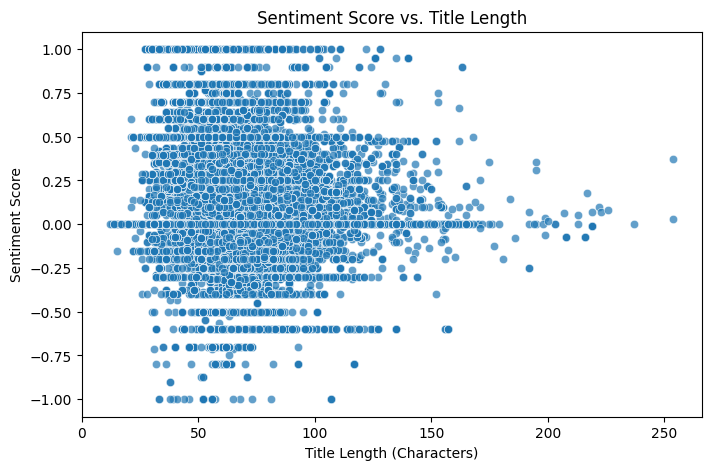

In [29]:
# 제목 길이 계산
news['title_length'] = news['til_ifo'].astype(str).apply(len)

# 산점도 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(data=news, x='title_length', y='sentiment_score', alpha=0.7)
plt.title('Sentiment Score vs. Title Length')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Sentiment Score')
plt.show()

### Task 2

# EDA 분석 노트

## 1. 데이터 컬럼별 특징 요약

### (1) `til_ifo` (뉴스 제목)
- **주요 단어 빈도**  
  - 상위 단어로 `buy`, `recommendation`, `estimates`, `maintains`, `report` 등이 관찰됨
  - 투자 의견(`buy`, `recommendation`) 및 애널리스트 리포트(`report`, `estimates`) 관련 단어가 많아, 뉴스가 **주식·투자** 분야에 집중되어 있음을 시사
- **인사이트**  
  - 제목에 “buy”나 “recommendation” 등이 들어간 기사는 긍정적(매수) 뉘앙스를 줄 가능성이 큼  
  - “maintains”, “report”와 같은 키워드도 실적 발표나 분석 보고서 관련 뉴스를 가리킬 수 있음

### (2) `rgs_dt` (등록일)
- **요일별 기사 수**  
  - 월~목: 기사량이 많음  
  - 금요일: 상대적으로 감소  
  - 주말(토·일): 기사량이 크게 줄어듦
- **의미**  
  - 금융 시장이 평일에 개장하는 특성 반영  
  - 주말에는 시장 휴장으로 인해 기사 발행이 적음
- **인사이트**   
  - 날짜를 `Month`, `Year`, `Quarter` 등으로 변환하여 시계열 트렌드를 살펴볼 수도 있음

### (3) `ctgy_clc` (카테고리)
- **상위 카테고리**  
  - Stocks Analysis, Markets, Stock News, Market Stock Options, Market Stock ETFs 등  
  - 주식/시장/ETF/옵션 관련이 대부분
- **인사이트**  
  - 카테고리 종류가 많다면 **그룹화**를 통해 큰 범주별(주식, ETF, 옵션, 배당, 실적 등)로 나누어 볼 수 있음  
  - 특정 카테고리(예: Dividends, Earnings 등)만 따로 분석해, 배당주 관련 뉴스 혹은 실적 발표 관련 뉴스를 집중적으로 탐색 가능

---

## 2. 추가 변수 아이디어


1. **`sentiment_label`**  
   - 감성 점수를 임계값에 따라 `Positive`, `Neutral`, `Negative`로 분류  
   - 시각화나 통계 분석 시 편리

2. **`CategoryGroup`**  
   - `ctgy_clc`를 더 큰 범주로 묶은 새 컬럼  
   - 예: `Stocks`, `Markets`, `Options`, `Earnings`, `Dividends` 등  
   - 카테고리가 지나치게 많을 경우, EDA가 복잡해지므로 그룹화 권장

3. **`HasBuyWord` / `HasSellWord`**  
   - 제목이나 본문에 `buy`, `sell`, `short` 등 특정 키워드가 등장하는지 0/1로 표시  
   - 매수/매도 의견 관련 기사를 구분하는 데 활용 가능

4. **시계열 변수**  
   - `Month`, `Quarter`, `Year` 등으로 구분해 **월별·분기별 추이** 분석

---

## 3. 종합 의견

- 본 데이터셋은 주식·시장·ETF·옵션 등 **투자 관련 뉴스**가 주를 이룸.  
- 평일에 기사량이 집중되고, 주말에는 적은 편.   
- “buy”나 “recommendation” 같은 **투자 의견** 키워드가 많음.  
- **추가 파생 변수**(IsWeekend, CategoryGroup, sentiment_label 등)를 생성하고,  
  - 감성 점수와 날짜·카테고리·특정 키워드 포함 여부 등을 **교차 분석**하면 더 심도 있는 인사이트를 얻을 수 있음.

위 내용들을 기반으로, **주가 변동**이나 **거래량** 같은 외부 지표와 연계하여 분석을 확장해야 할 듯함
예를 들어, "긍정 감성 기사가 많은 날, 실제 주가가 상승했는가?” 등을 확인함으로써 **뉴스 감성**과 **시장 반응** 간의 상관관계를 탐색
